In [1]:
NUM_CIRCUITS = 70
NUM_SHOTS = 8192

In [2]:
from qiskit import *


In [3]:
def generate_free_evolution_circuits():
    qc_multiple = [QuantumCircuit(5, 5) for _ in range(NUM_CIRCUITS)]

    for (idx, qc) in enumerate(qc_multiple):
        # qc.x(1)
        qc.u(51.95, -83.84, 244.53, 1)
        for _ in range(280 * (idx + 1)):
            qc.id(1)
            qc.id(1)
        # qc.x(1)
        qc.u(-51.95, 83.84, -244.53, 1)

        qc.barrier()
        for i in range(5):
            qc.measure(i, i)
        # qc.draw()
    return qc_multiple

In [17]:
def generate_dd_spectator_circuits():
    qc_multiple = [QuantumCircuit(5, 5) for _ in range(NUM_CIRCUITS)]

    for (idx, qc) in enumerate(qc_multiple):
        # qc.x(1)
        qc.u(51.95, -83.84, 244.53, 1)
        for _ in range(280*(idx + 1)):
            for i in range(5):
                if i != 1:
                    qc.x(i)
                    qc.y(i)
                else:
                    qc.id(i)
                    qc.id(i)
        # qc.x(1)
        qc.u(-51.95, 83.84, -244.53, 1)

        qc.barrier()
        for i in range(5):
            qc.measure(i, i)
        # qc.draw()
    return qc_multiple

In [4]:
def generate_dd_main_circuits():
    qc_multiple = [QuantumCircuit(5, 5) for _ in range(NUM_CIRCUITS)]

    for (idx, qc) in enumerate(qc_multiple):
        # qc.x(1)
        qc.u(51.95, -83.84, 244.53, 1)
        for _ in range(280*(idx + 1)):
            for i in range(5):
                if i == 1:
                    qc.x(i)
                    qc.y(i)
                else:
                    qc.id(i)
                    qc.id(i)
        # qc.x(1)
        qc.u(-51.95, 83.84, -244.53, 1)

        qc.barrier()
        for i in range(5):
            qc.measure(i, i)
        # qc.draw()
    return qc_multiple

In [5]:
from qiskit.providers.fake_provider import FakeQuito

sim = FakeQuito()

In [7]:
qc_free_evolve = generate_free_evolution_circuits()

In [21]:
qc_dd_spectator = generate_dd_spectator_circuits()

In [6]:
dd_circuits = generate_dd_main_circuits()
# transpile(dd_circuits[2], sim, optimization_level=0).draw()

In [8]:
qc_trans_free_evolve = transpile(qc_free_evolve, sim, optimization_level=0)


In [9]:
qc_trans_dd_main = transpile(dd_circuits, sim, optimization_level=0)


In [22]:
qc_trans_dd_spec = transpile(qc_dd_spectator, sim, optimization_level=0)

In [10]:
# qc_transpile[0].draw()

In [12]:
result_free_evolution = execute(qc_trans_free_evolve, sim, shots=NUM_SHOTS).result().to_dict()

In [11]:
result_dd_main = execute(qc_trans_dd_main, sim, shots=NUM_SHOTS).result().to_dict()


In [23]:
result_dd_spec = execute(qc_trans_dd_spec, sim, shots=NUM_SHOTS).result().to_dict()


In [13]:
def calculate_fidilities(result_dict):
    fidilities = []
    for i in range(NUM_CIRCUITS):
        result = result_dict['results'][i]
        zero_count = result['data']['counts']['0x0']
        fidilities.append(zero_count/NUM_SHOTS)
    return fidilities

In [15]:
fidilities_free_evolution = calculate_fidilities(result_free_evolution)


In [14]:
fidilities_dd_main = calculate_fidilities(result_dd_main)

In [24]:
fidilities_dd_spec = calculate_fidilities(result_dd_spec)


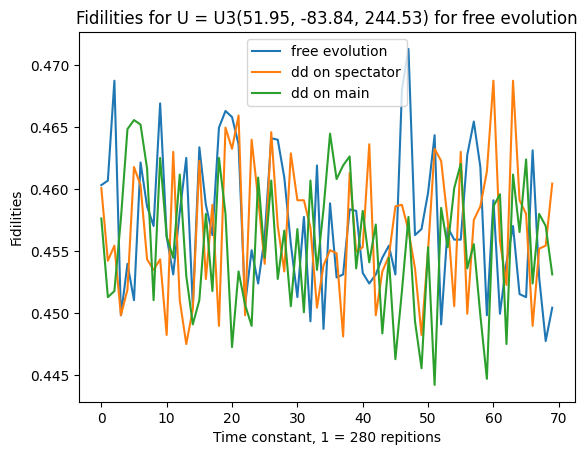

In [27]:
import matplotlib.pyplot as plt

plt.plot(fidilities_free_evolution, label="free evolution")
plt.plot(fidilities_dd_spec, label="dd on spectator")
plt.plot(fidilities_dd_main, label="dd on main")


plt.title("Fidilities for U = U3(51.95, -83.84, 244.53) for free evolution")
plt.xlabel("Time constant, 1 = 280 repitions")
plt.ylabel("Fidilities")
plt.legend()